<a href="https://colab.research.google.com/github/jagangirisaballa/iNeuron-Assignments/blob/master/Jagan_Matplotlib_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0, 0.5, 'Min and max temperature')

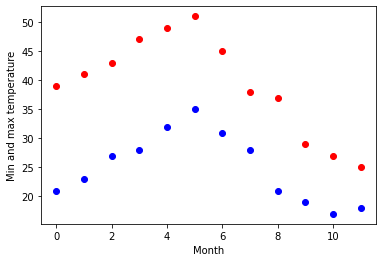

In [15]:
import numpy as np

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [0]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

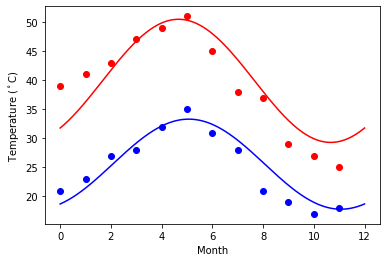

In [7]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()


In [0]:
import pandas as pd

In [0]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
df = pd.read_csv(url)

In [40]:
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [41]:
df.shape

(1310, 16)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1310 non-null   int64  
 1   pclass            1309 non-null   float64
 2   survived          1309 non-null   float64
 3   name              1309 non-null   object 
 4   sex               1309 non-null   object 
 5   age               1310 non-null   float64
 6   sibsp             1309 non-null   float64
 7   parch             1309 non-null   float64
 8   ticket            1309 non-null   object 
 9   fare              1308 non-null   float64
 10  cabin             295 non-null    object 
 11  embarked          1310 non-null   object 
 12  boat              486 non-null    object 
 13  body              121 non-null    float64
 14  home.dest         745 non-null    object 
 15  has_cabin_number  1310 non-null   int64  
dtypes: float64(7), int64(2), object(7)
memory 

In [43]:
df['sex'].isnull().sum()

1

In [44]:
df['fare'].isna().sum()

2

In [45]:
df.loc[df['fare'].isna()]

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1225,1226,3.0,0.0,"Storey, Mr. Thomas",male,60.500000,0.0,0.0,3701,NaN,NaN,S,NaN,261.0,NaN,0
1309,1310,NaN,NaN,NaN,NaN,29.881135,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,0


Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

Text(0.5, 1.0, 'Male/Female proportion')

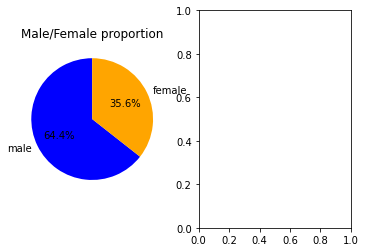

In [47]:
count=df['sex'].value_counts()
colors = ['blue', 'orange']
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(count.values.tolist(), labels=count.index.values.tolist(), colors=colors,startangle=90,
        autopct='%.1f%%')
ax1.set_title('Male/Female proportion')

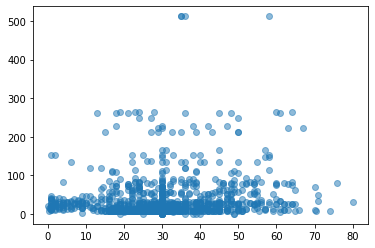

In [49]:
plt.scatter(df['age'],df['fare'],alpha=0.5)
plt.show()

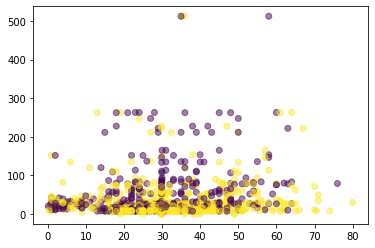

In [51]:
plt.scatter(df['age'],df['fare'], alpha=0.5,c=pd.factorize(df['sex'])[0])
plt.show()

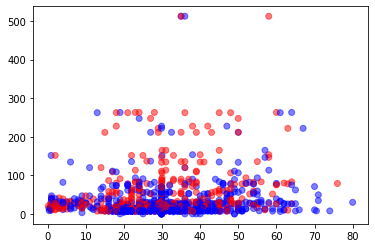

In [52]:
df = df.dropna(subset=['sex'])

mapping = {'male' : 'blue', 'female' : 'red'}
plt.scatter(df['age'], df['fare'], alpha=0.5, c=df['sex'].map(mapping))

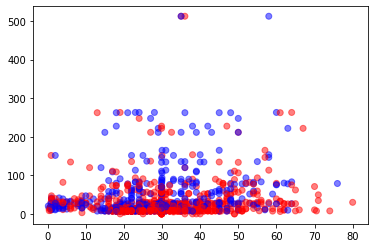

In [53]:
colors = {'male':'red', 'female':'blue'}
fig2, ax2 = plt.subplots()
ax2.scatter(df['age'], df['fare'], alpha=0.5, c=df['sex'].apply(lambda x: colors[x]))